In [5]:
!pip install fpdf matplotlib seaborn


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
import pandas as pd
file_name = 'ASSESSMENT DATA Portfolio Analyst copy copy.xlsx'
df = pd.read_excel(file_name)


In [12]:
df_cleaned = df.dropna()

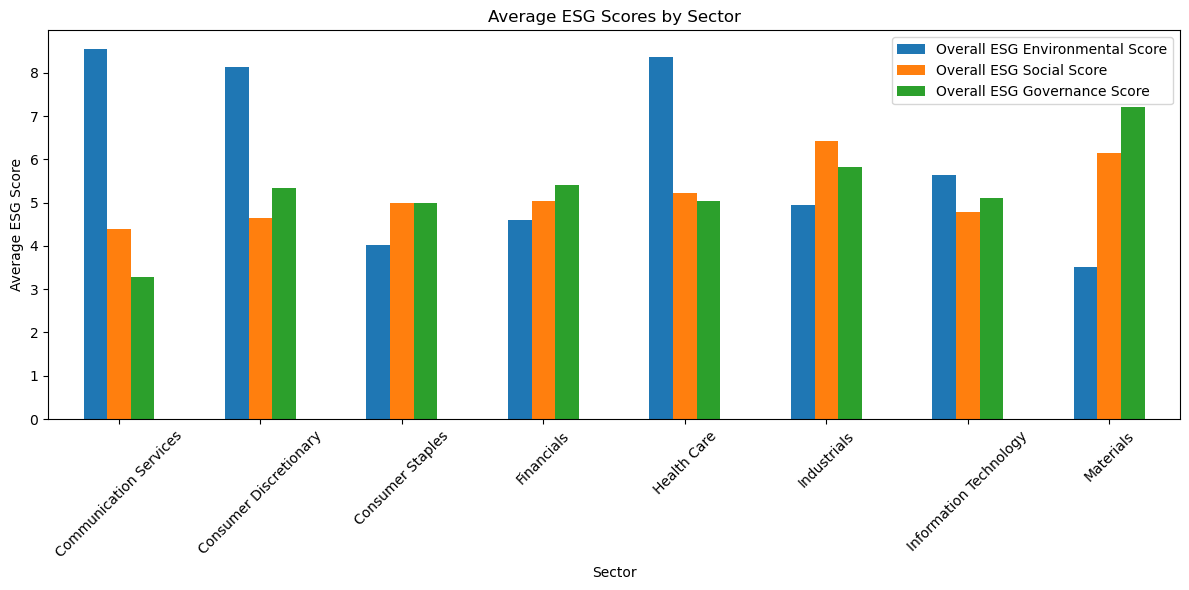

In [147]:
# Average ESG scores (Environmental, Social, Governance) by sector
sector_esg = df_cleaned.groupby('GICS_sector')[['Overall ESG Environmental Score',
                                       'Overall ESG Social Score',
                                       'Overall ESG Governance Score']].mean()

sector_esg.plot(kind='bar', figsize=(12, 6))
plt.title('Average ESG Scores by Sector')
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Average ESG Scores by Sector.png")
plt.show()


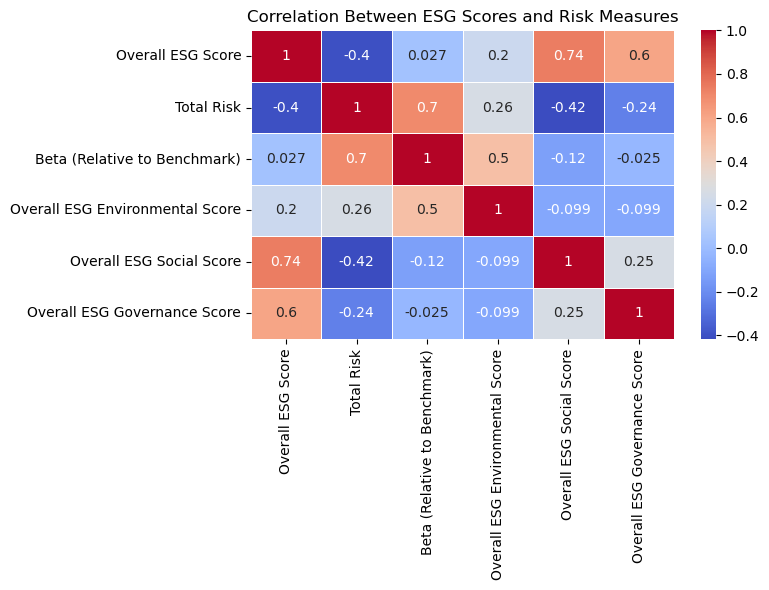

In [17]:
# Correlation matrix between ESG scores and risk measures
correlation_matrix = df_cleaned[['Overall ESG Score', 'Total Risk', 'Beta (Relative to Benchmark)',
                         'Overall ESG Environmental Score', 'Overall ESG Social Score', 'Overall ESG Governance Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between ESG Scores and Risk Measures')
plt.tight_layout()
plt.show()


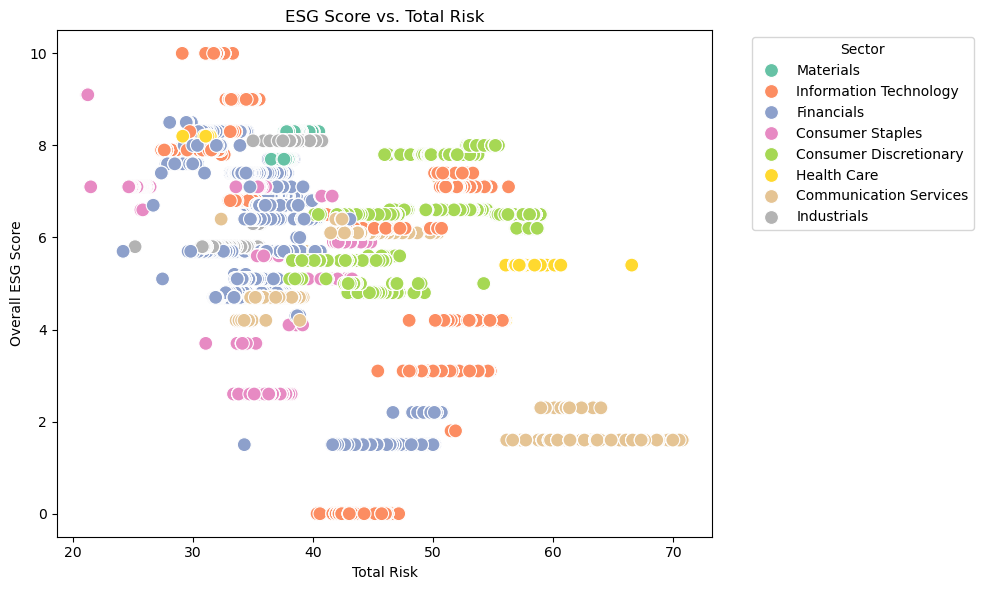

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Risk', y='Overall ESG Score', data=df_cleaned, hue='GICS_sector', palette='Set2', s=100)
plt.title('ESG Score vs. Total Risk')
plt.xlabel('Total Risk')
plt.ylabel('Overall ESG Score')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

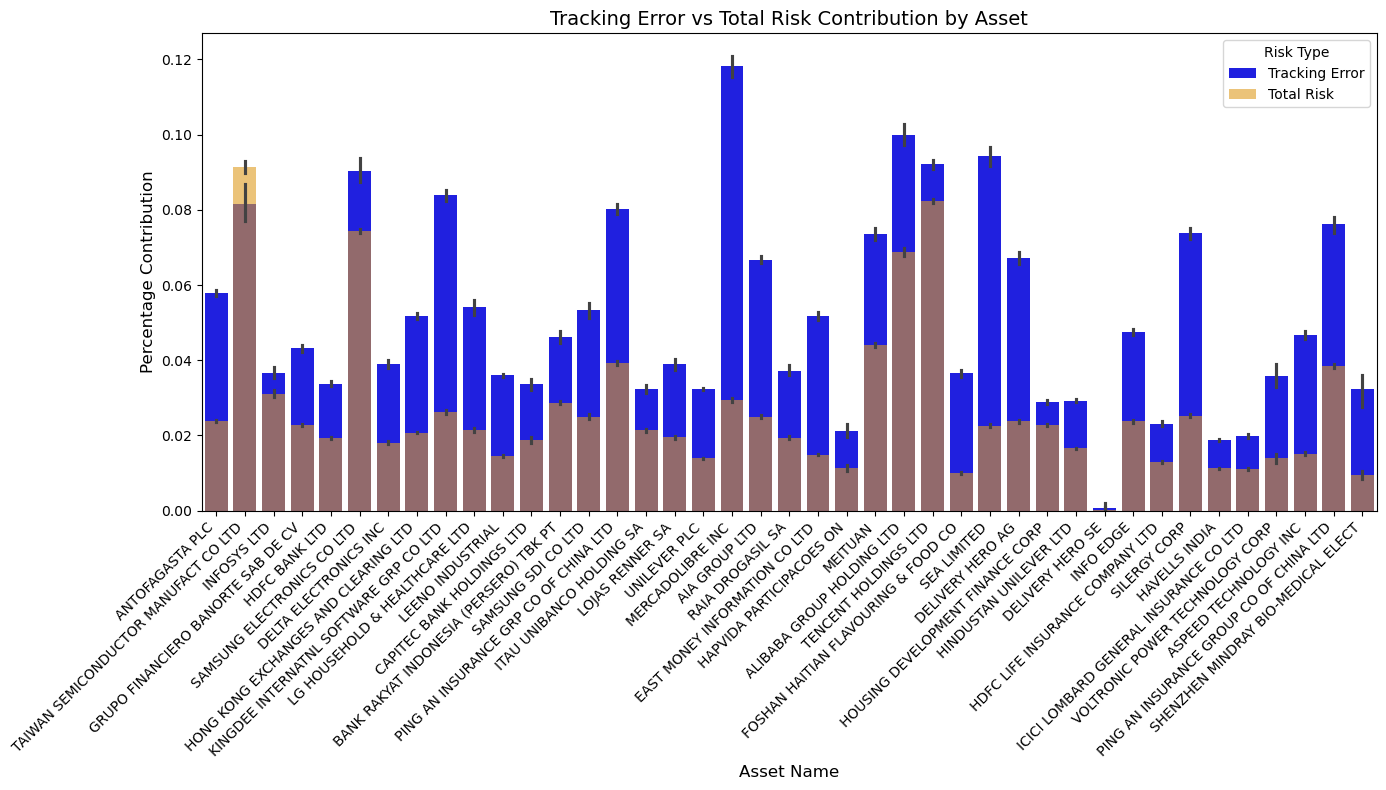

In [21]:
# Plotting tracking error and total risk across assets
plt.figure(figsize=(14, 8))
sns.barplot(data=df_cleaned, x='Asset Name', y='%Contribution to Tracking Error', color='blue', label='Tracking Error')
sns.barplot(data=df_cleaned, x='Asset Name', y='%Contribution to Total Risk', color='orange', label='Total Risk', alpha=0.6)

plt.xlabel('Asset Name', fontsize=12)
plt.ylabel('Percentage Contribution', fontsize=12)
plt.title('Tracking Error vs Total Risk Contribution by Asset', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Risk Type")

plt.tight_layout()
plt.show()


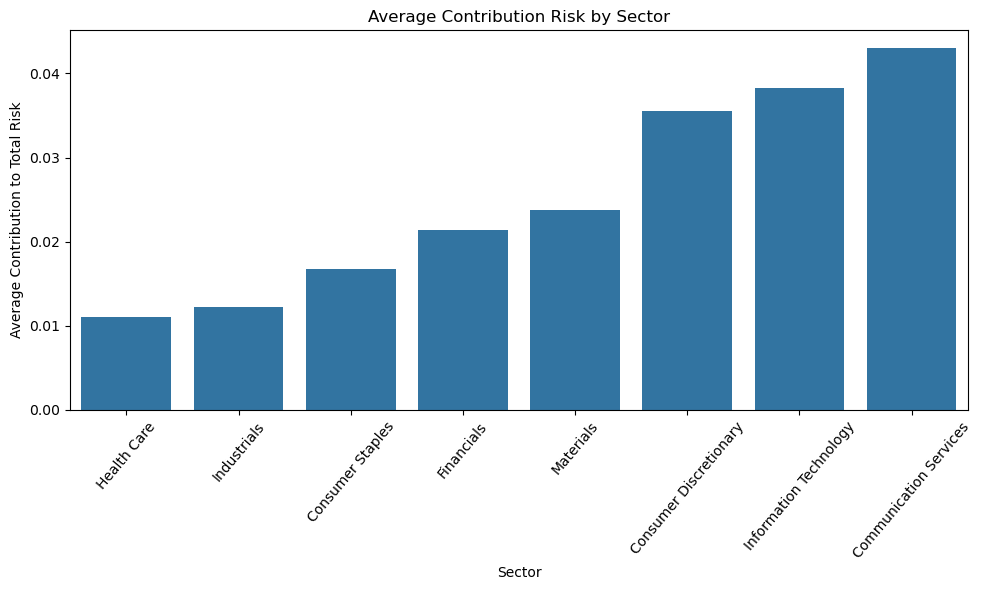

In [136]:
sector_risk = df_cleaned.groupby('GICS_sector')['%Contribution to Total Risk'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=sector_risk.index, y=sector_risk.values)
plt.title('Average Contribution Risk by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Contribution to Total Risk')
plt.xticks(rotation=50)
plt.tight_layout()
plt.savefig("Avg Sector contribution Risk.png")
plt.show()


C:\Users\Jaimin\AppData\Local\Temp\ipykernel_10496\630529184.py:2: UserWarning:


The palette list has fewer values (6) than needed (41) and will cycle, which may produce an uninterpretable plot.



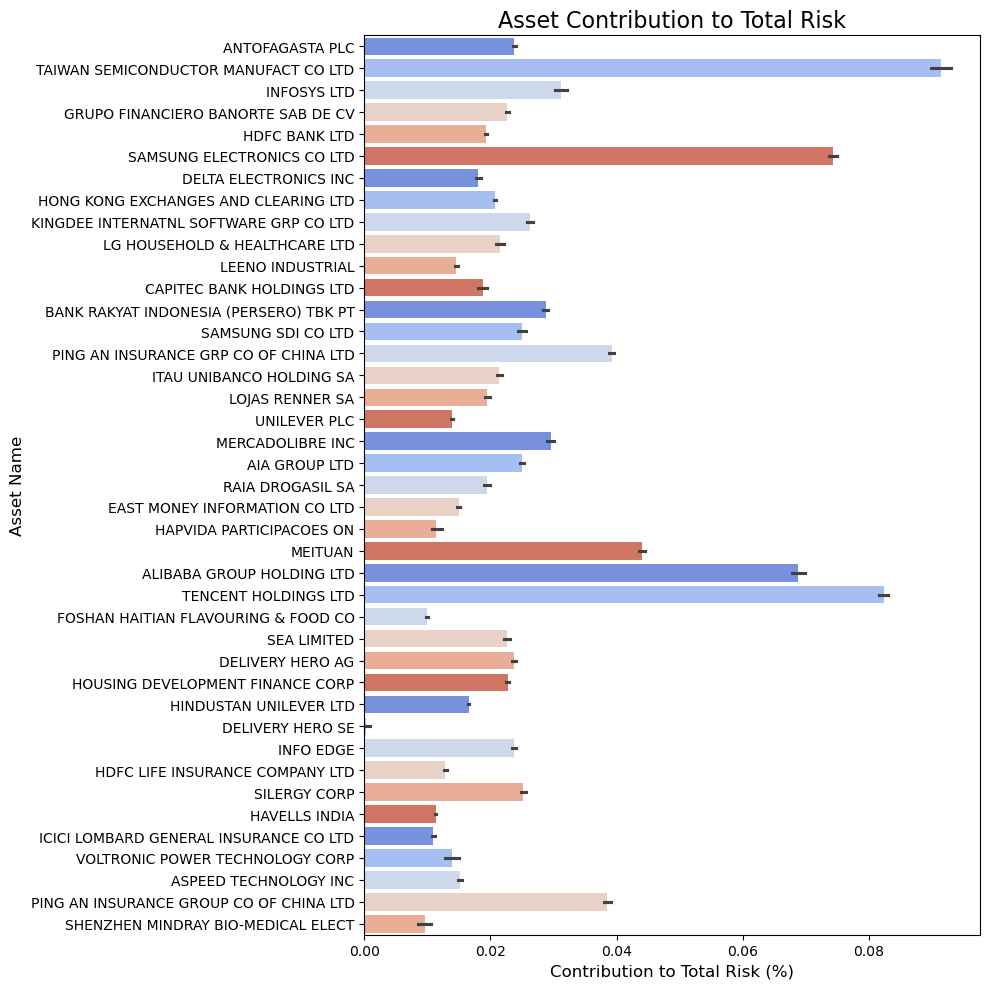

In [161]:
plt.figure(figsize=(10, 10))
sns.barplot(x='%Contribution to Total Risk', y='Asset Name', data=df_cleaned, palette=palette, hue='Asset Name', legend=False)
plt.xticks(rotation=0)
plt.title('Asset Contribution to Total Risk', fontsize=16)
plt.xlabel('Contribution to Total Risk (%)', fontsize=12)
plt.ylabel('Asset Name', fontsize=12)
plt.tight_layout()
plt.savefig("Asset ctr.png")
plt.show()


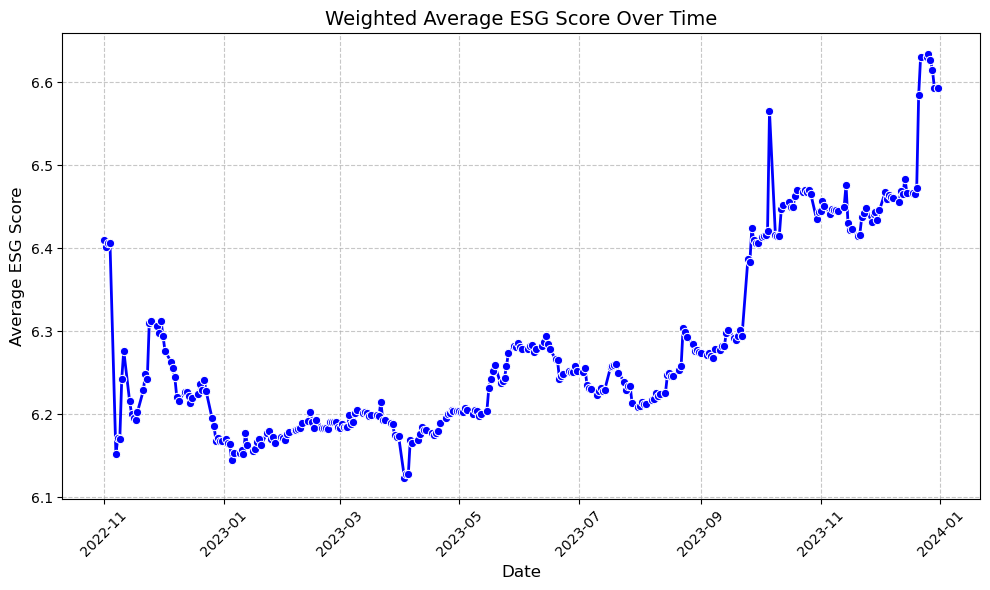

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = df_cleaned.copy()
df_cleaned.loc[:, 'refdate'] = pd.to_datetime(df_cleaned['refdate'])
df_cleaned.loc[:, 'Weighted_ESG_Score'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Score']

portfolio_summary = df_cleaned.groupby('refdate').agg({
    'Weight (%)': 'sum',
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum',
    'Weighted_ESG_Score': 'sum'
}).reset_index()

portfolio_summary['Average_ESG_Score'] = (
    portfolio_summary['Weighted_ESG_Score'] / portfolio_summary['Weight (%)']
)

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=portfolio_summary,
    x='refdate',
    y='Average_ESG_Score',
    marker='o',
    color='blue',
    linewidth=2
)

plt.title("Weighted Average ESG Score Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average ESG Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("weighted_esg_trend.png")
plt.show()


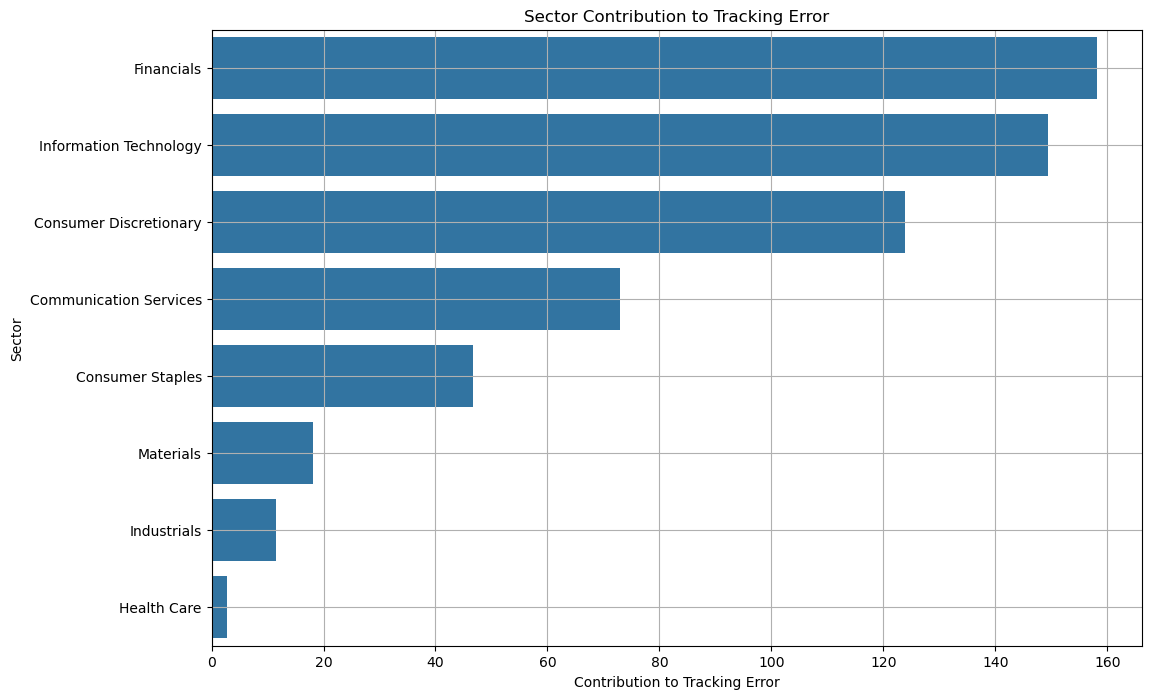

In [80]:
sector_risk = df_cleaned.groupby('GICS_sector').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()
sector_risk = sector_risk.sort_values('%Contribution to Tracking Error', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_risk, x='%Contribution to Tracking Error', y='GICS_sector')
plt.title("Sector Contribution to Tracking Error")
plt.xlabel("Contribution to Tracking Error")
plt.ylabel("Sector")
plt.grid()
plt.savefig("sector_tracking_error.png")
plt.show()

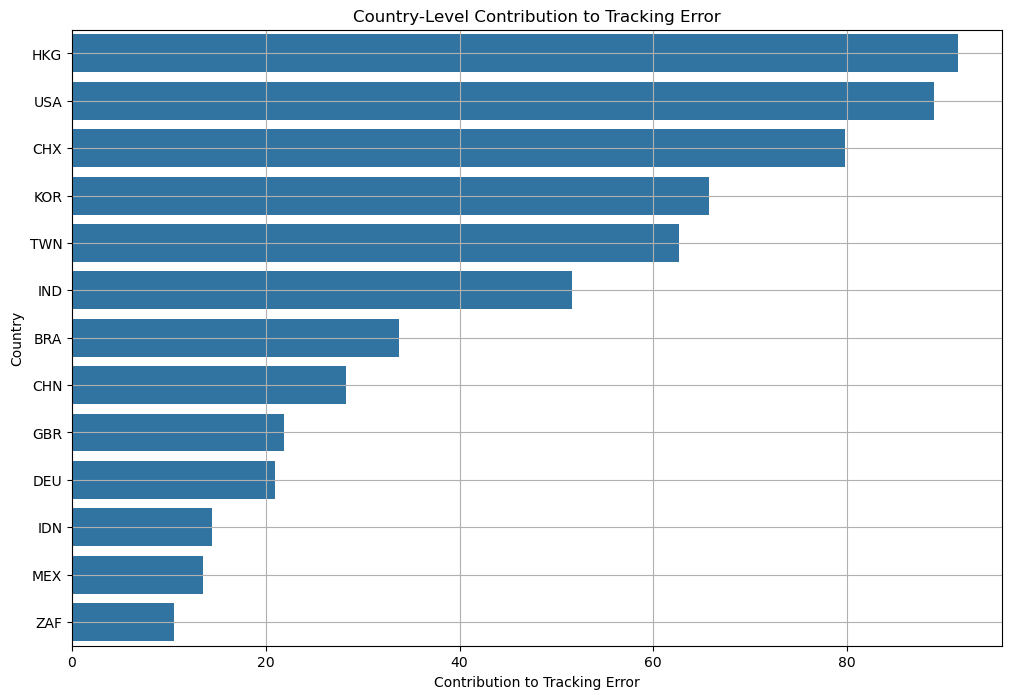

In [58]:
country_risk = df_cleaned.groupby('Country').agg({
    '%Contribution to Tracking Error': 'sum',
    '%Contribution to Total Risk': 'sum'
}).reset_index()

# Sort by tracking error contribution
country_risk = country_risk.sort_values('%Contribution to Tracking Error', ascending=False)

# Visualization: Country-level contribution to tracking error
plt.figure(figsize=(12, 8))
sns.barplot(data=country_risk, x='%Contribution to Tracking Error', y='Country')
plt.title("Country-Level Contribution to Tracking Error")
plt.xlabel("Contribution to Tracking Error")
plt.ylabel("Country")
plt.grid()
plt.savefig("country_tracking_error.png")
plt.show()

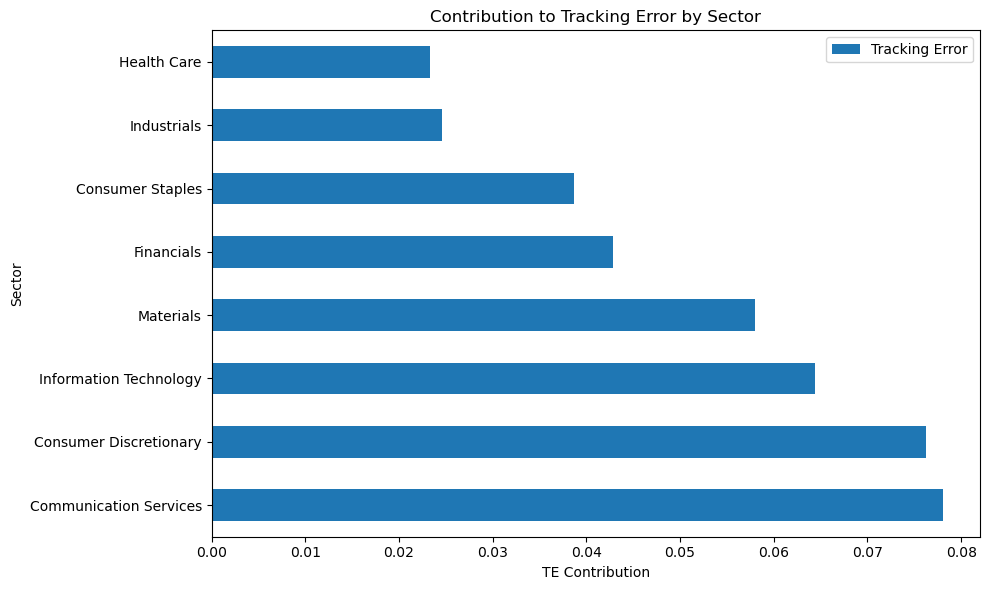

In [94]:
sector_risk = df_cleaned.groupby('GICS_sector')['%Contribution to Tracking Error'].mean().reset_index()

# Sort by tracking error contribution
sector_risk = sector_risk.sort_values('%Contribution to Tracking Error', ascending=False)

# Stacked bar plot
sector_risk.plot(
    x='GICS_sector',
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Contribution to Tracking Error by Sector')
plt.xlabel('TE Contribution')
plt.ylabel('Sector')
plt.legend(['Tracking Error'])
plt.tight_layout()
plt.savefig('sector_risk_contribution.png')
plt.show()


In [35]:
!pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   --------- ------------------------------ 15.5/65.9 MB 107.8 MB/s eta 0:00:01
   ---------------------------- ----------- 46.4/65.9 MB 128.5 MB/s eta 0:00:01
   ---------------------------------------- 65.9/65.9 MB 116.7 MB/s eta 0:00:00


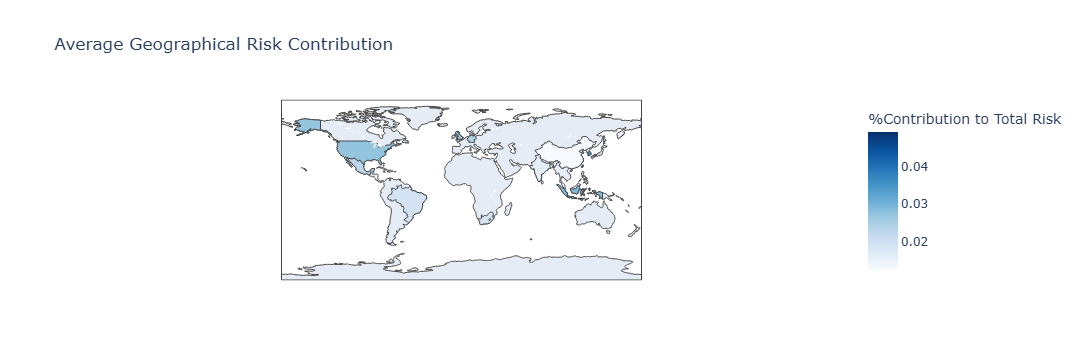

In [98]:

import plotly.express as px
country_risk = df_cleaned.groupby('Country')['%Contribution to Total Risk'].mean().reset_index()


fig = px.choropleth(
    country_risk,
    locations='Country',
    locationmode='ISO-3',
    color='%Contribution to Total Risk',
    title='Average Geographical Risk Contribution',
    color_continuous_scale='Blues'
)
fig.write_html('geographical_risk_contribution.html')
fig.show()


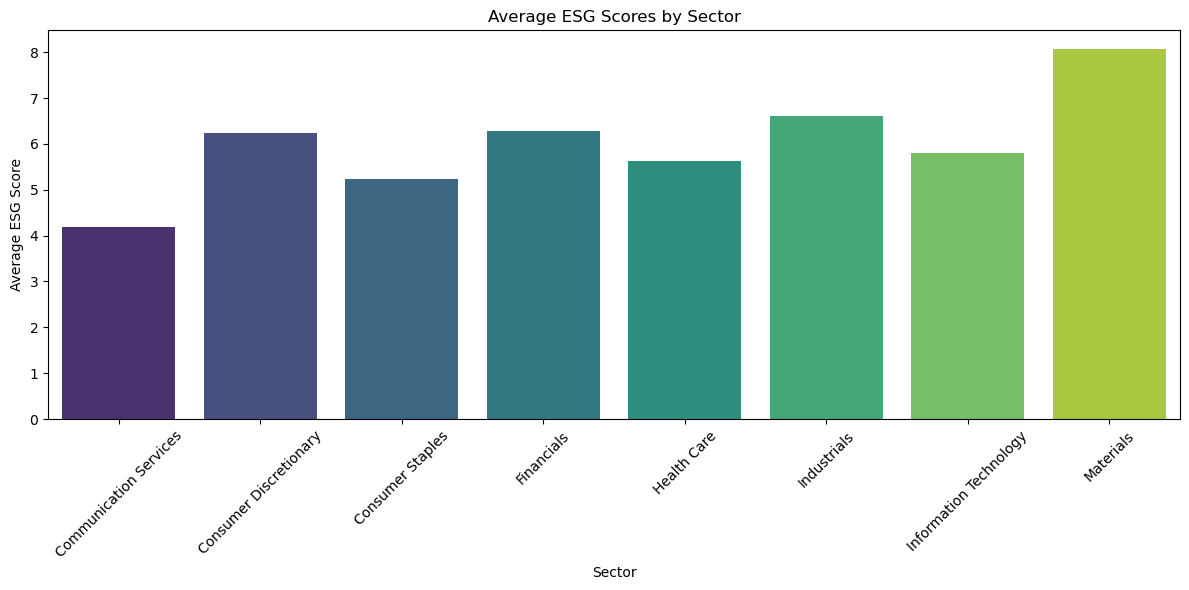

In [39]:
plt.figure(figsize=(12, 6))
sector_avg_esg = df_cleaned.groupby('GICS_sector')['Overall ESG Score'].mean().reset_index()
sns.barplot(data=sector_avg_esg, x='GICS_sector', y='Overall ESG Score', hue='GICS_sector', palette='viridis', legend=False)
plt.title('Average ESG Scores by Sector')
plt.xticks(rotation=45)
plt.xlabel('Sector')
plt.ylabel('Average ESG Score')
plt.tight_layout()
plt.savefig('average_esg_scores_by_sector.png')
plt.show()


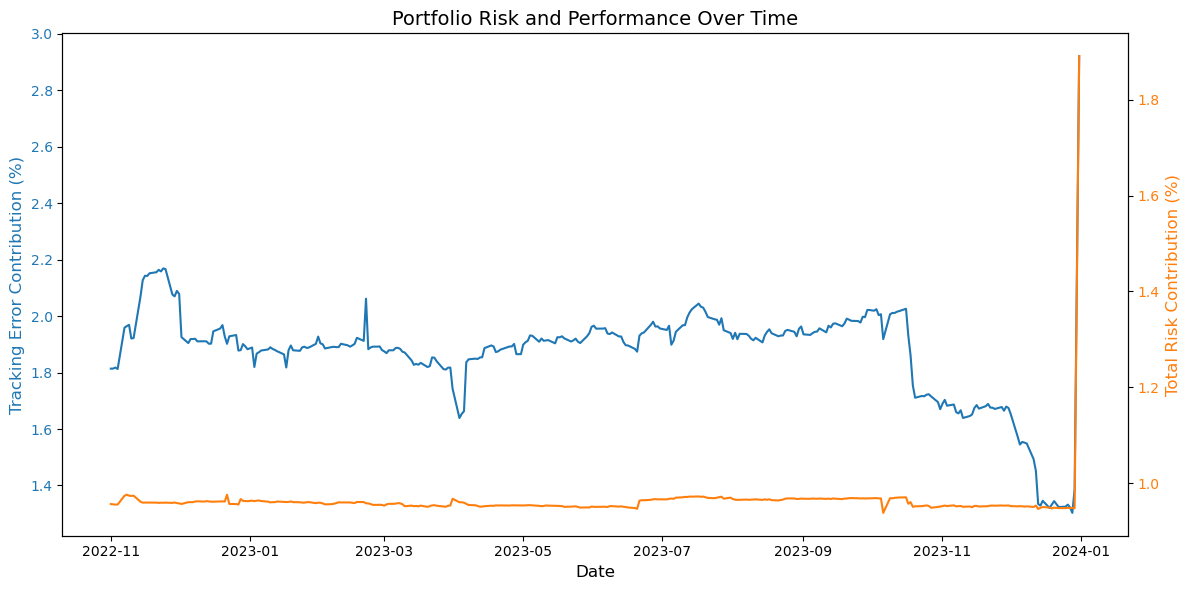

In [41]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Portfolio Risk and Performance Over Time', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Tracking Error Contribution (%)', color='tab:blue', fontsize=12)
ax1.plot(portfolio_summary['refdate'], portfolio_summary['%Contribution to Tracking Error'], color='tab:blue', label='Tracking Error')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Risk Contribution (%)', color='tab:orange', fontsize=12)
ax2.plot(portfolio_summary['refdate'], portfolio_summary['%Contribution to Total Risk'], color='tab:orange', label='Total Risk')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.savefig('portfolio_risk_performance.png')
plt.show()


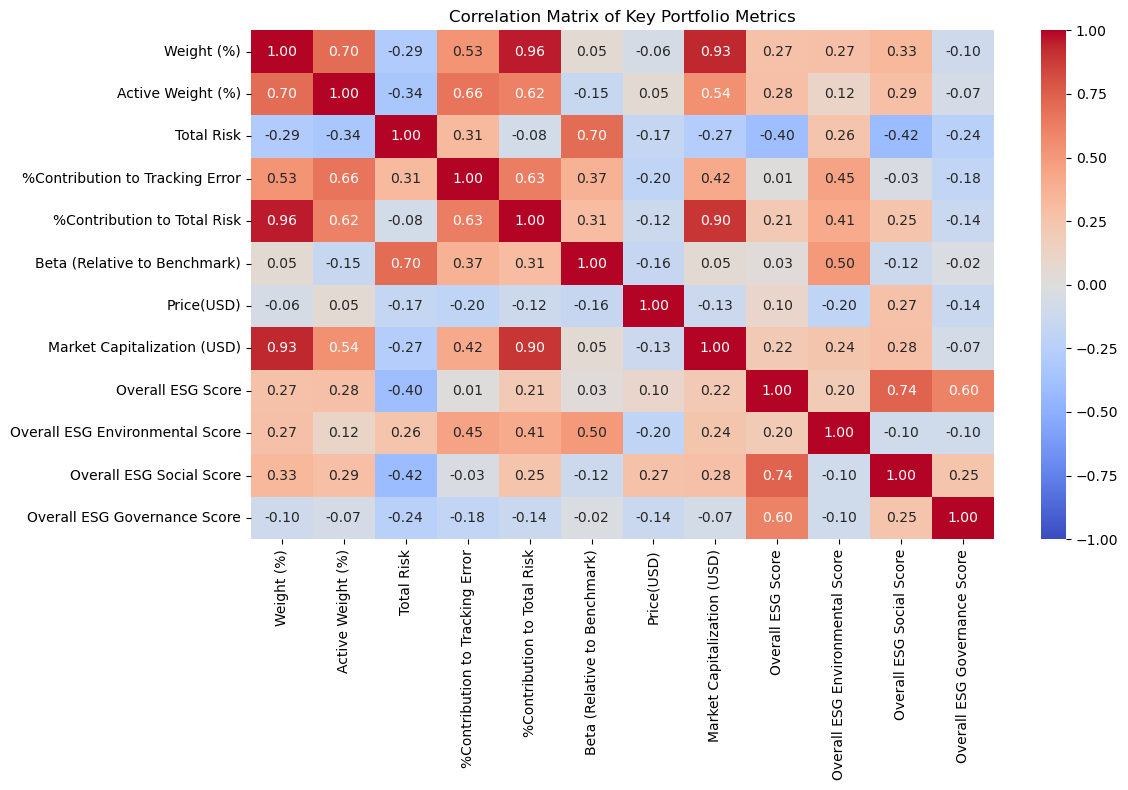

In [82]:
corr_matrix = df_cleaned[['Weight (%)', 'Active Weight (%)', 'Total Risk', '%Contribution to Tracking Error',
                          '%Contribution to Total Risk', 'Beta (Relative to Benchmark)', 'Price(USD)',
                          'Market Capitalization (USD)', 'Overall ESG Score', 'Overall ESG Environmental Score',
                          'Overall ESG Social Score', 'Overall ESG Governance Score']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Key Portfolio Metrics')
plt.tight_layout()
plt.savefig('Correlation Matrix of Key Portfolio Metrics.png')
plt.show()

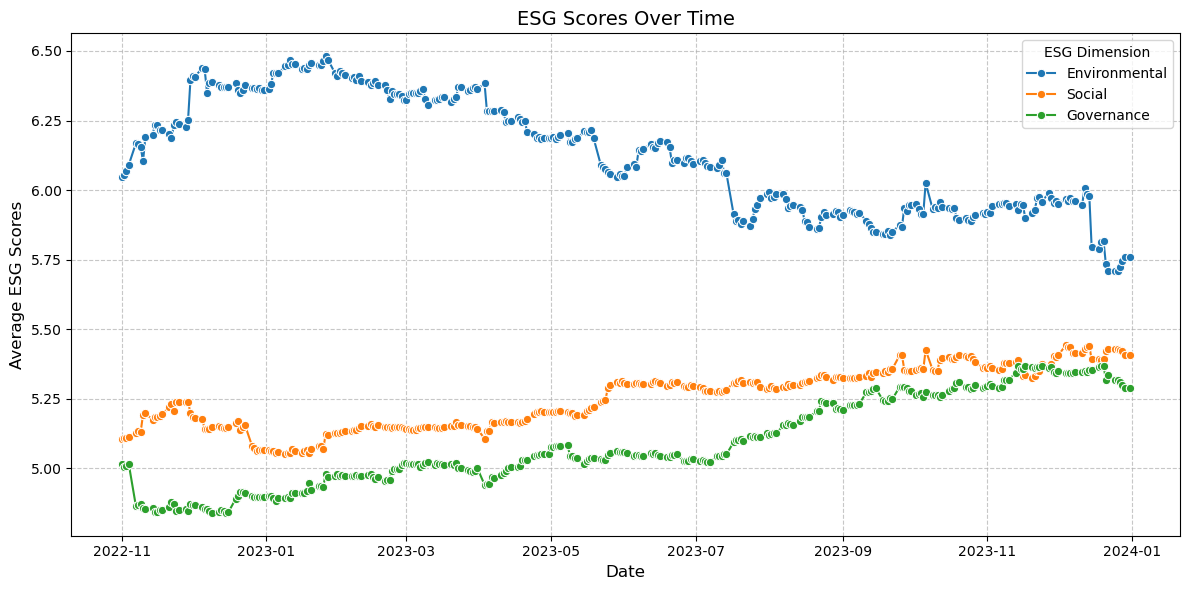

In [84]:
# Calculate weighted ESG dimension scores
df_cleaned['Weighted_ESG_Environmental'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Environmental Score']
df_cleaned['Weighted_ESG_Social'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Social Score']
df_cleaned['Weighted_ESG_Governance'] = df_cleaned['Weight (%)'] * df_cleaned['Overall ESG Governance Score']

# Aggregate at the portfolio level
portfolio_summary = df_cleaned.groupby('refdate').agg({
    'Weight (%)': 'sum',
    'Weighted_ESG_Environmental': 'sum',
    'Weighted_ESG_Social': 'sum',
    'Weighted_ESG_Governance': 'sum'
}).reset_index()

# Calculate averages for each ESG dimension
portfolio_summary['Average_ESG_Environmental'] = (
    portfolio_summary['Weighted_ESG_Environmental'] / portfolio_summary['Weight (%)']
)
portfolio_summary['Average_ESG_Social'] = (
    portfolio_summary['Weighted_ESG_Social'] / portfolio_summary['Weight (%)']
)
portfolio_summary['Average_ESG_Governance'] = (
    portfolio_summary['Weighted_ESG_Governance'] / portfolio_summary['Weight (%)']
)

# Plot ESG dimension trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Environmental', label='Environmental', marker='o')
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Social', label='Social', marker='o')
sns.lineplot(data=portfolio_summary, x='refdate', y='Average_ESG_Governance', label='Governance', marker='o')

# Customize plot
plt.title('ESG Scores Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average ESG Scores', fontsize=12)
plt.legend(title='ESG Dimension')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('esg_dimension_trends.png')
plt.show()


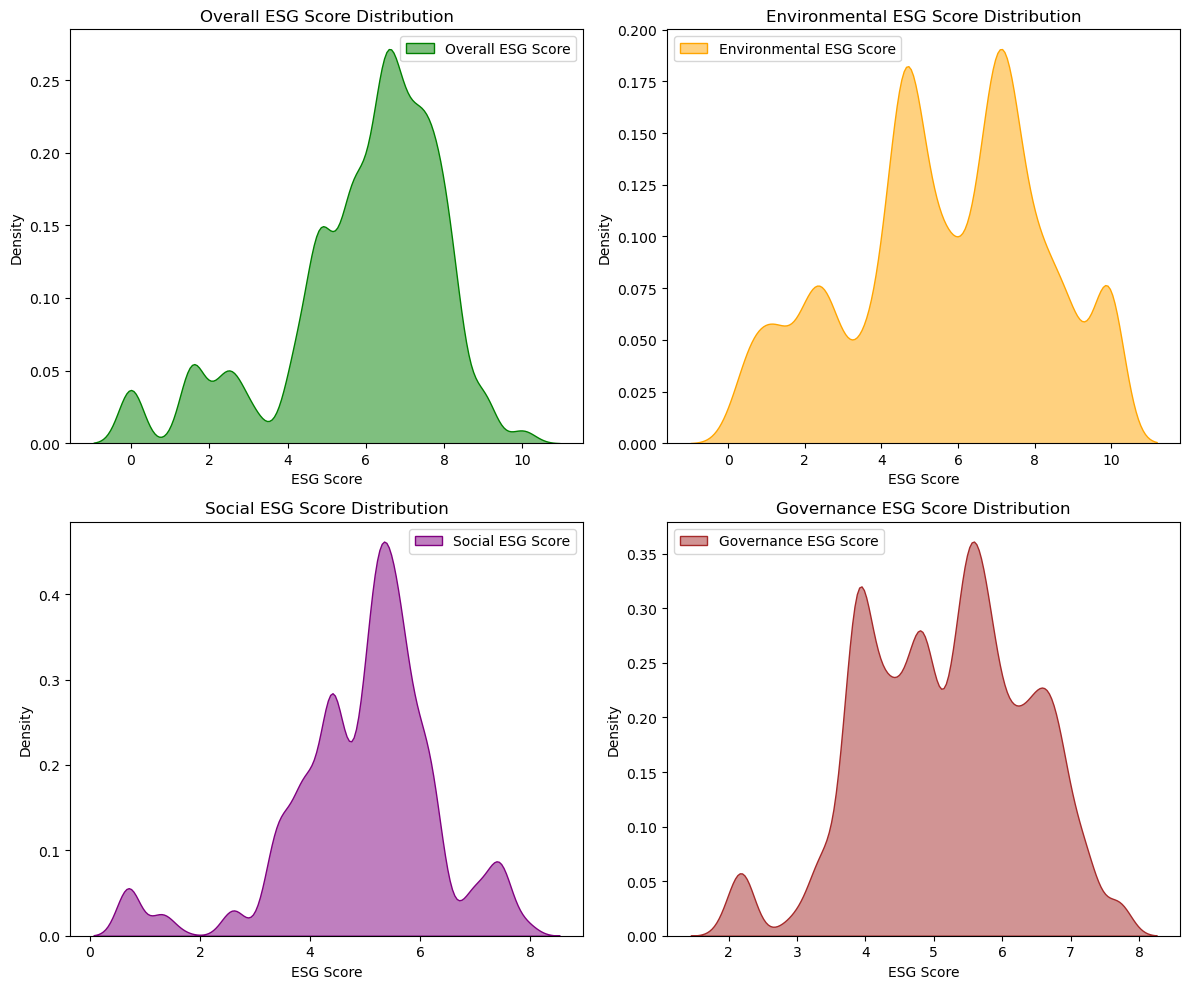

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.kdeplot(df_cleaned['Overall ESG Score'], ax=axes[0, 0], color='green', fill=True, alpha=0.5, label='Overall ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Environmental Score'], ax=axes[0, 1], color='orange', fill=True, alpha=0.5, label='Environmental ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Social Score'], ax=axes[1, 0], color='purple', fill=True, alpha=0.5, label='Social ESG Score')
sns.kdeplot(df_cleaned['Overall ESG Governance Score'], ax=axes[1, 1], color='brown', fill=True, alpha=0.5, label='Governance ESG Score')
axes[0, 0].set_title('Overall ESG Score Distribution')
axes[0, 1].set_title('Environmental ESG Score Distribution')
axes[1, 0].set_title('Social ESG Score Distribution')
axes[1, 1].set_title('Governance ESG Score Distribution')
for ax in axes.flat:
    ax.set_xlabel('ESG Score')
    ax.set_ylabel('Density')
    ax.legend()
plt.tight_layout()
plt.savefig('esg_KDE.png')
plt.show()


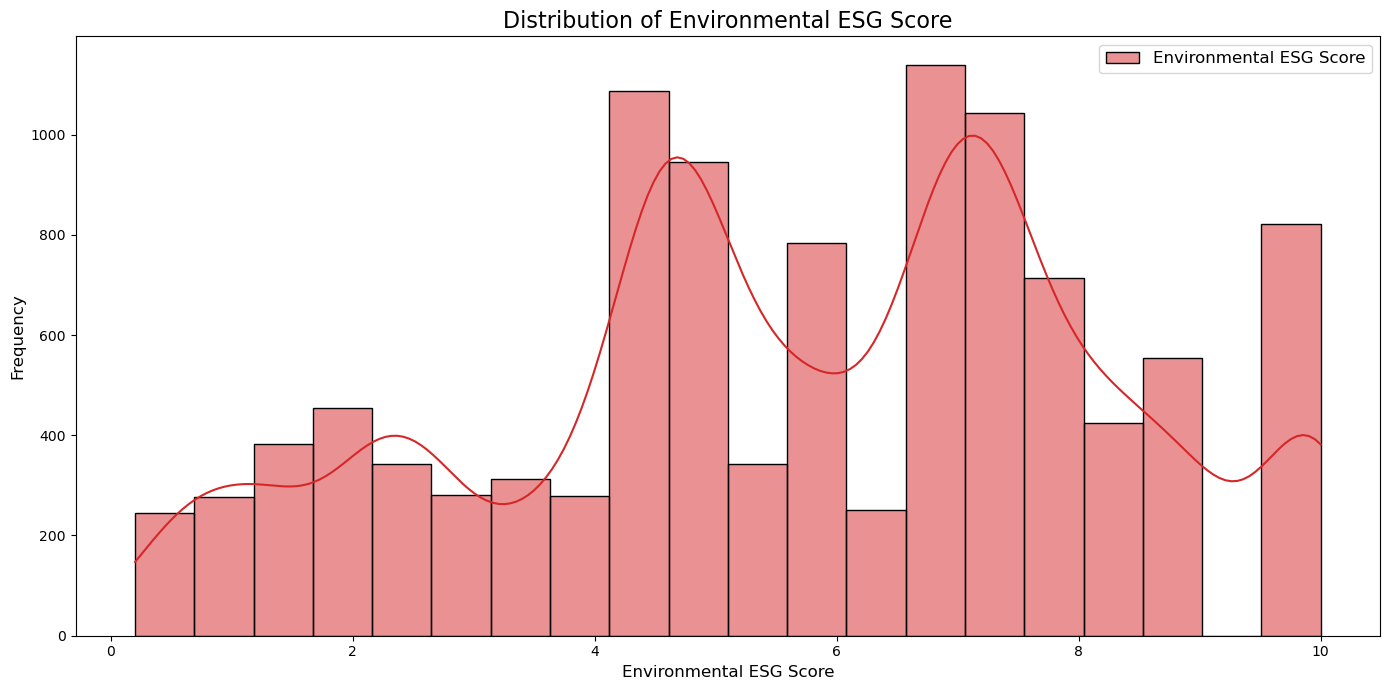

In [49]:
plt.figure(figsize=(14, 7))
sns.histplot(df_cleaned['Overall ESG Environmental Score'], kde=True, color='#d62728', bins=20, label='Environmental ESG Score', edgecolor='black')
plt.title('Distribution of Environmental ESG Score', fontsize=16)
plt.xlabel('Environmental ESG Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


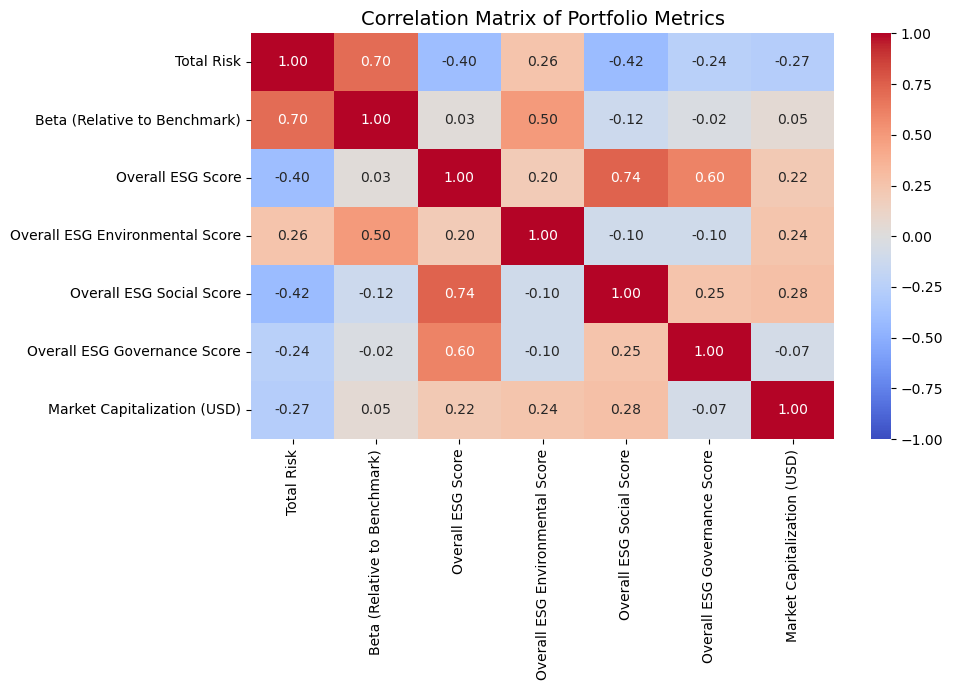

In [51]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['Total Risk', 'Beta (Relative to Benchmark)', 'Overall ESG Score',
                                 'Overall ESG Environmental Score', 'Overall ESG Social Score',
                                 'Overall ESG Governance Score', 'Market Capitalization (USD)']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Portfolio Metrics', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Jaimin\AppData\Local\Temp\ipykernel_10496\374519029.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




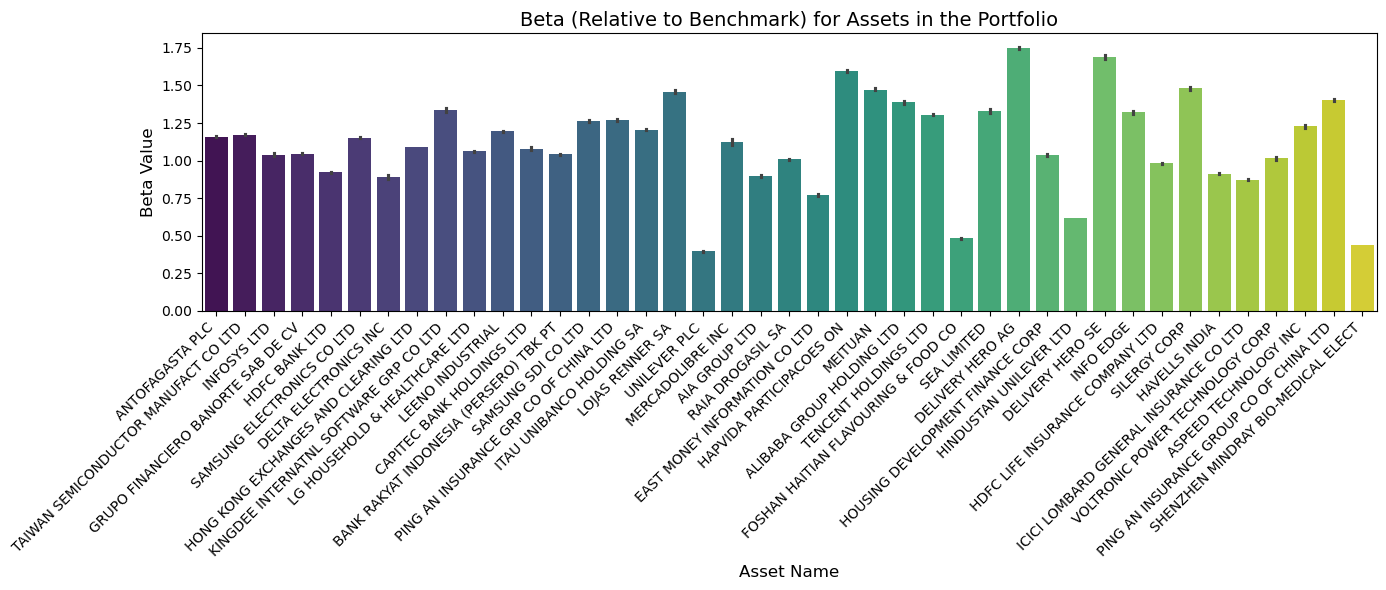

In [53]:
# Plotting the beta values of assets relative to the benchmark
plt.figure(figsize=(14, 6))

sns.barplot(data=df_cleaned, x='Asset Name', y='Beta (Relative to Benchmark)', palette='viridis')

# Add labels and title
plt.xlabel('Asset Name', fontsize=12)
plt.ylabel('Beta Value', fontsize=12)
plt.title('Beta (Relative to Benchmark) for Assets in the Portfolio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


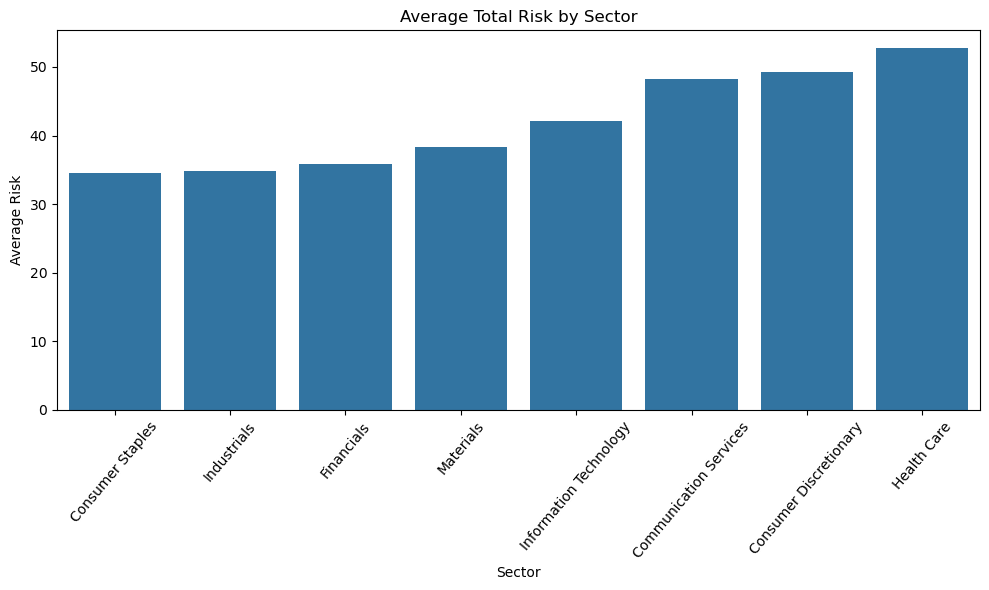

In [113]:
sector_risk = df_cleaned.groupby('GICS_sector')['Total Risk'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=sector_risk.index, y=sector_risk.values)
plt.title('Average Total Risk by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Risk')
plt.xticks(rotation=50)
plt.tight_layout()
plt.savefig("Avg Sector Risk.png")
plt.show()

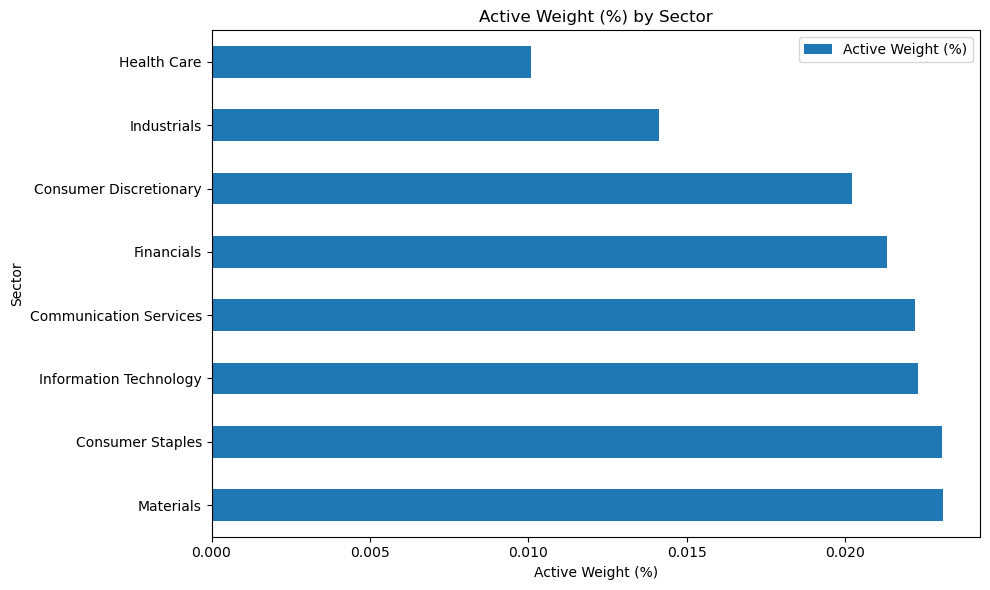

In [145]:
sector_risk = df_cleaned.groupby('GICS_sector')['Active Weight (%)'].mean().reset_index()

# Sort by tracking error contribution
sector_risk = sector_risk.sort_values('Active Weight (%)', ascending=False)

# Stacked bar plot
sector_risk.plot(
    x='GICS_sector',
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Active Weight (%) by Sector')
plt.xlabel('Active Weight (%)')
plt.ylabel('Sector')
plt.legend(['Active Weight (%)'])
plt.tight_layout()
plt.savefig('sector_active_wgt.png')
plt.show()